In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import glob
import os
import random
import datetime
import re
import json

Initializing source files...
Value of omega: 0.5480533272647967
Ideal topology found with omega between [0.4, 0.6]


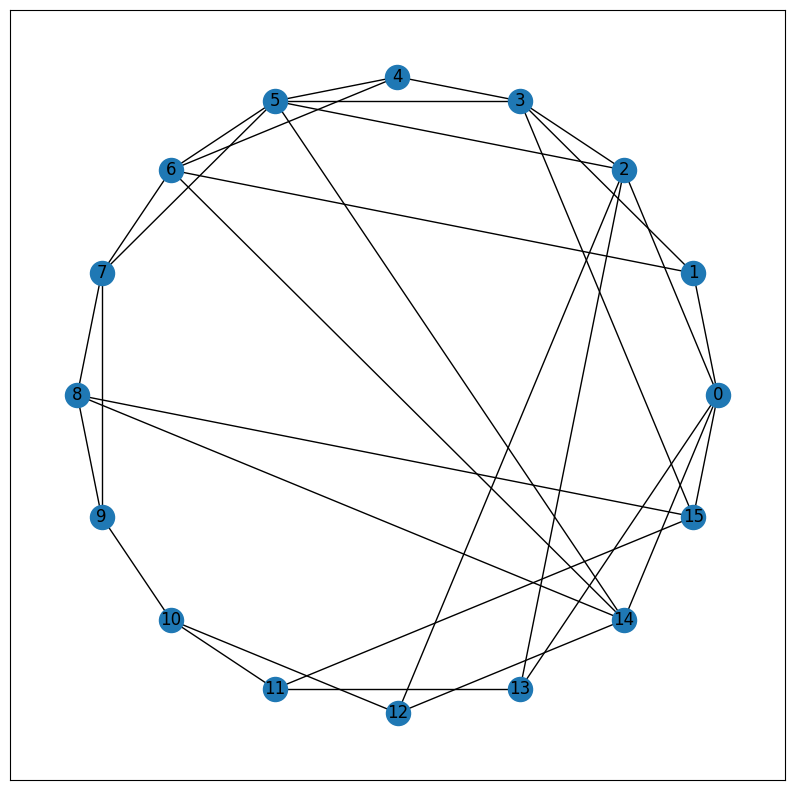

In [2]:
from src import generate
from src import validate_config

validate_config("moralnet")
graph = generate("moralnet", test=False, write=False)

In [4]:
import random
from itertools import chain
rounds = 3
dyads = [(u,v) for (u,v) in graph.edges]
interaction_sequence = []
tries = 5000

# This is 8 for n = 16
ideal_matching_size = round(len(graph.nodes()) / 2)
tries_since_ideal_matching = 0

print(f"Total available dyads: {len(dyads)}")

while tries:
    
    matching = set()
    matching.add(random.choice(dyads))

    nodes_in_matching = set(chain(*matching))

    for dyad in dyads:
        u,v = dyad
        if u not in nodes_in_matching and v not in nodes_in_matching:
            matching.add((u,v))
            nodes_in_matching.update({u,v})

    if len(matching) == ideal_matching_size:
        interaction_sequence.append(matching)
        print("Matching added to sequence")
        for matched in matching:
            dyads.remove(matched)
        print(f"{len(dyads)} remain for matching")
        if len(interaction_sequence) == rounds:
            break
    
    if tries_since_ideal_matching > 1000:
        ideal_matching_size -= 1
        print(f"new ideal matching size: {ideal_matching_size}")
        tries_since_ideal_matching = 0
    
    tries -= 1
    tries_since_ideal_matching += 1

print(f"Interaction sequence for {rounds} rounds found:")
interaction_sequence

Total available dyads: 32
Matching added to sequence
24 remain for matching
new ideal matching size: 7
Matching added to sequence
17 remain for matching
Matching added to sequence
10 remain for matching
Interaction sequence for 3 rounds found:


[{(0, 1), (2, 3), (4, 5), (6, 7), (8, 15), (9, 10), (11, 13), (12, 14)},
 {(0, 14), (1, 3), (2, 12), (4, 6), (5, 7), (8, 9), (10, 11)},
 {(0, 15), (1, 6), (2, 13), (3, 4), (5, 14), (7, 8), (10, 12)}]